<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming and Numerical Methods - A Guide for Engineers and Scientists](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9), the content is also available at [Berkeley Python Numerical Methods](https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html).*

*The copyright of the book belongs to Elsevier. We also have this interactive book online for a better learning experience. The code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work on [Elsevier](https://www.elsevier.com/books/python-programming-and-numerical-methods/kong/978-0-12-819549-9) or [Amazon](https://www.amazon.com/Python-Programming-Numerical-Methods-Scientists/dp/0128195495/ref=sr_1_1?dchild=1&keywords=Python+Programming+and+Numerical+Methods+-+A+Guide+for+Engineers+and+Scientists&qid=1604761352&sr=8-1)!*

<!--NAVIGATION-->
< [24.2 Discrete Fourier Transform (DFT)](chapter24.02-Discrete-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.4 FFT in Python](chapter24.04-FFT-in-Python.ipynb) >

# Fast Fourier Transform (FFT)

The **Fast Fourier Transform (FFT)** is an efficient algorithm to calculate the DFT of a sequence. It is described first in Cooley and Tukey's classic paper in 1965, but the idea actually can be traced back to Gauss's unpublished work in 1805. It is a divide and conquer algorithm that recursively breaks the DFT into smaller DFTs to bring down the computation. As a result, it successfully reduces the complexity of the DFT from $O(n^2)$ to $O(nlogn)$, where $n$ is the size of the data. This reduction in computation time is significant especially for data with large $N$, therefore, making FFT widely used in engineering, science and mathematics. The FFT algorithm is the [Top 10 algorithm of 20th century](https://www.computer.org/csdl/magazine/cs/2000/01/c1022/13rRUxBJhBm) by the journal Computing in Science & Engineering. 

In this section, we will introduce you how does the FFT reduces the computation time. The content of this section is heavily based on this [great tutorial](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/) put together by [Jake VanderPlas](http://vanderplas.com). 

## Symmetries in the DFT

The answer to how FFT speedup the computing of DFT lies in the exploitation of the symmetries in the DFT. Let's take a look of the symmetries in the DFT. From the definition of the DFT equation

$$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}$$

we can calculate the 
 
$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}$$

Note that, $e^{-i2\pi{n}} = 1$, therefore, we have 

$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k$$

with a little extension, we can have 

$$X_{k+i\cdot N} = X_k, \text{ for any integer i}$$

This means that within the DFT, we clearly have some symmetries that we can use to reduce the computation. 

## Tricks in FFT 

Since we know there are symmetries in the DFT, we can consider to use it reduce the computation, because if we need to calculate both $X_k$ and $X_{k+N}$, we only need to do this once. This is exactly the idea behind the FFT. Cooley and Tukey showed that we can calculate DFT more efficiently if we continue to divide the problem into smaller ones. Let's first divide the whole series into two parts, i.e. the even number part and the odd number part:

\begin{eqnarray*}
X_{k} &=& \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} \\
      &=& \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}}
\end{eqnarray*}

We can see that, the two smaller terms which only have half of the size ($\frac{N}{2}$) in the above equation are two smaller DFTs. For each term, the $ 0\leq m \le \frac{N}{2}$, but $ 0\leq k \le N$, therefore, we can see that half of the values will be the same due to the symmetry properties we described above. Thus, we only need to calculate half of the fields in each term. Of course, we don't need to stop here, we can continue to divide each term into half with the even and odd values until it reaches the last two numbers, then calculation will be really simple. 

This is how FFT works using this recursive approach. Let's see a quick and dirty implementation of the FFT. Note that, the input signal to FFT should have a length of power of 2. If the length is not, usually we need to fill up zeros to the next power of 2 size. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [2]:
def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

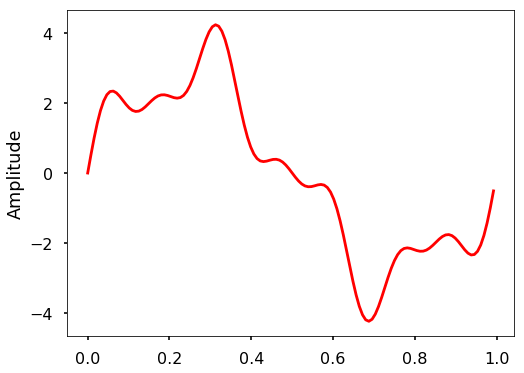

In [3]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

**TRY IT!** Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies. 

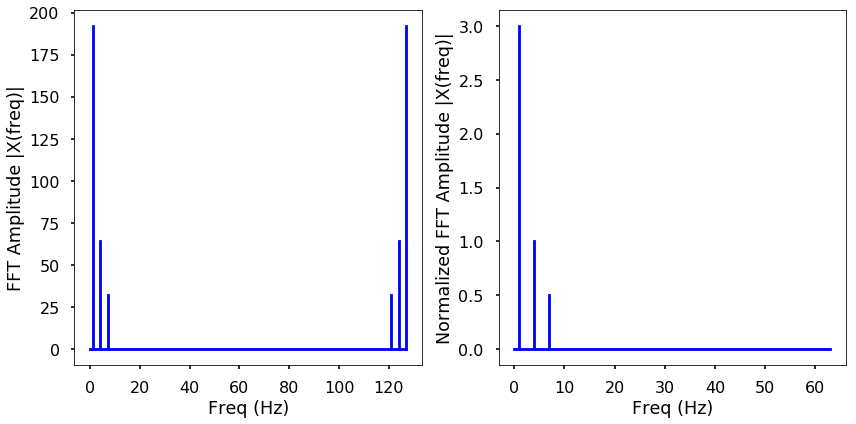

In [4]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

**TRY IT!** Generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT. 

In [5]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [6]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

16.9 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can see that, for a signal with length 2048 (about 2000), this implementation of FFT uses 16.9 ms instead of 120 ms using DFT. Note that, there are also a lot of ways to optimize the FFT implementation which will make it faster. In the next section, we will take a look of the Python built-in FFT functions, which will be much faster. 

<!--NAVIGATION-->
< [24.2 Discrete Fourier Transform (DFT)](chapter24.02-Discrete-Fourier-Transform.ipynb) | [Contents](Index.ipynb) | [24.4 FFT in Python](chapter24.04-FFT-in-Python.ipynb) >